### PREPARING THE TOOLS

In [1]:
#Import all the tools which we need

#Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for the plots to be displayed inside the notebook
%matplotlib inline 

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


## load Data

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

### EDA

Goal is to find out more about the data and become a subject matter expert on the data set.

1. what questions we are trying so solve?
2. what kind of data we have with us and how do we treat different types?
3. what is missing from the data and how do we deal with it?
4. Finding about the outliers and how well should we treat them?
5. How should i add, change or remove features to get better results?


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

* here the values are approximately balanced and so on this problem of classificaiton is called balanced classificaiton.


<Axes: >

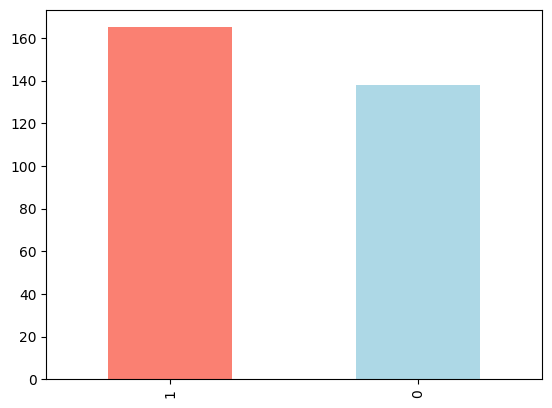

In [5]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

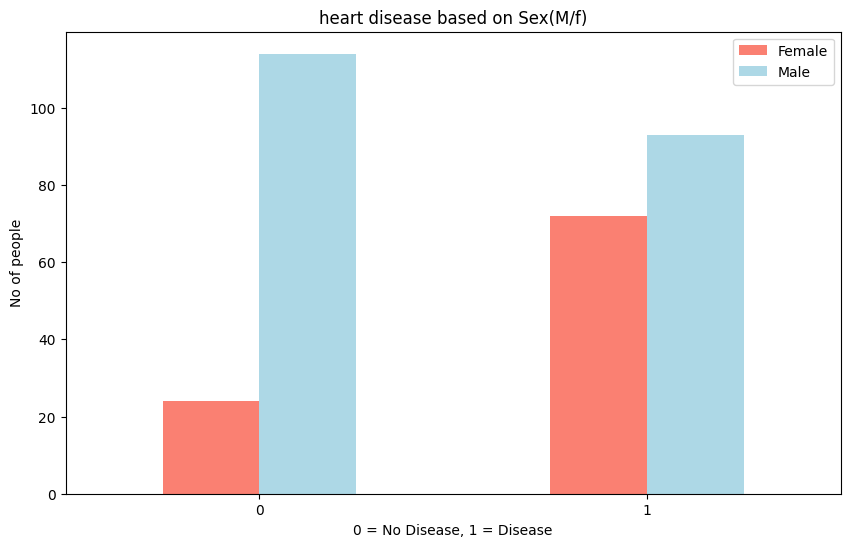

In [8]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=[10,6], 
                                    color=["salmon", "lightblue"])
plt.title("heart disease based on Sex(M/f)")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

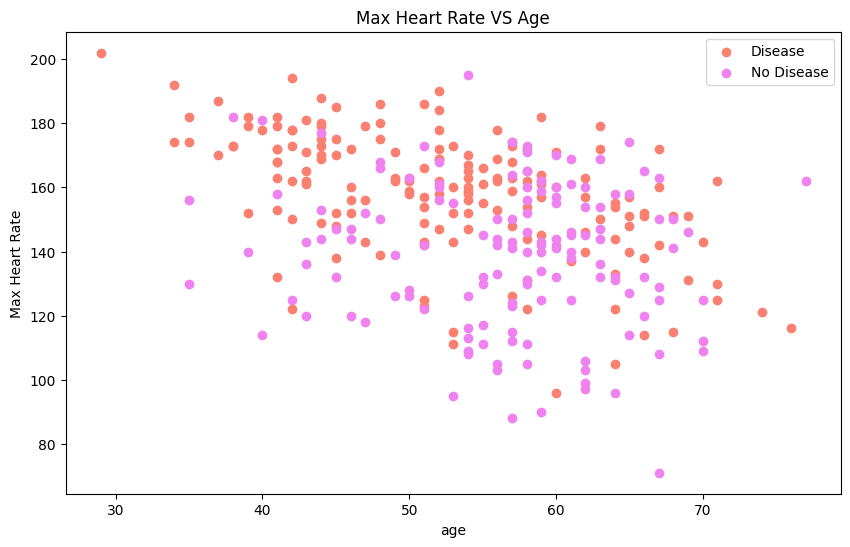

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], 
            c = "salmon")

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], 
            c = "violet")
plt.xlabel("age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate VS Age")
plt.legend(["Disease", "No Disease"])

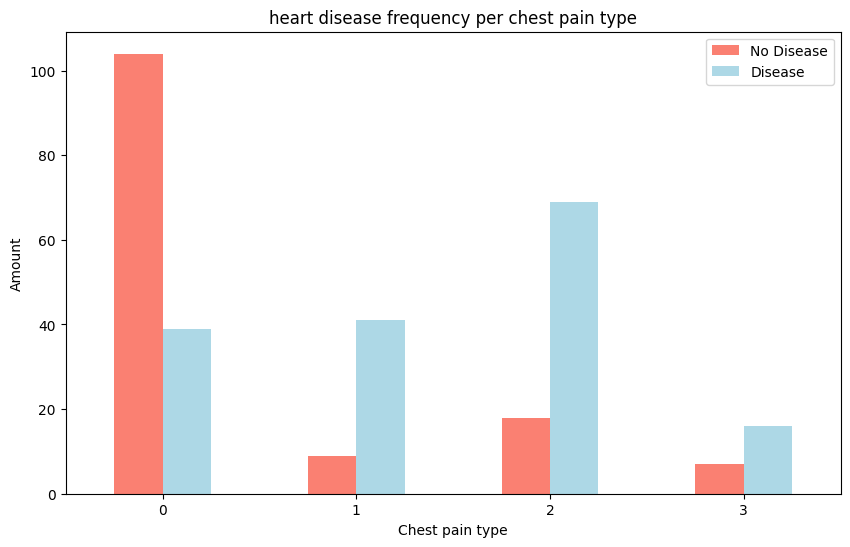

In [10]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                    figsize=[10,6], 
                                    color=["salmon", "lightblue"])
plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation = 0);

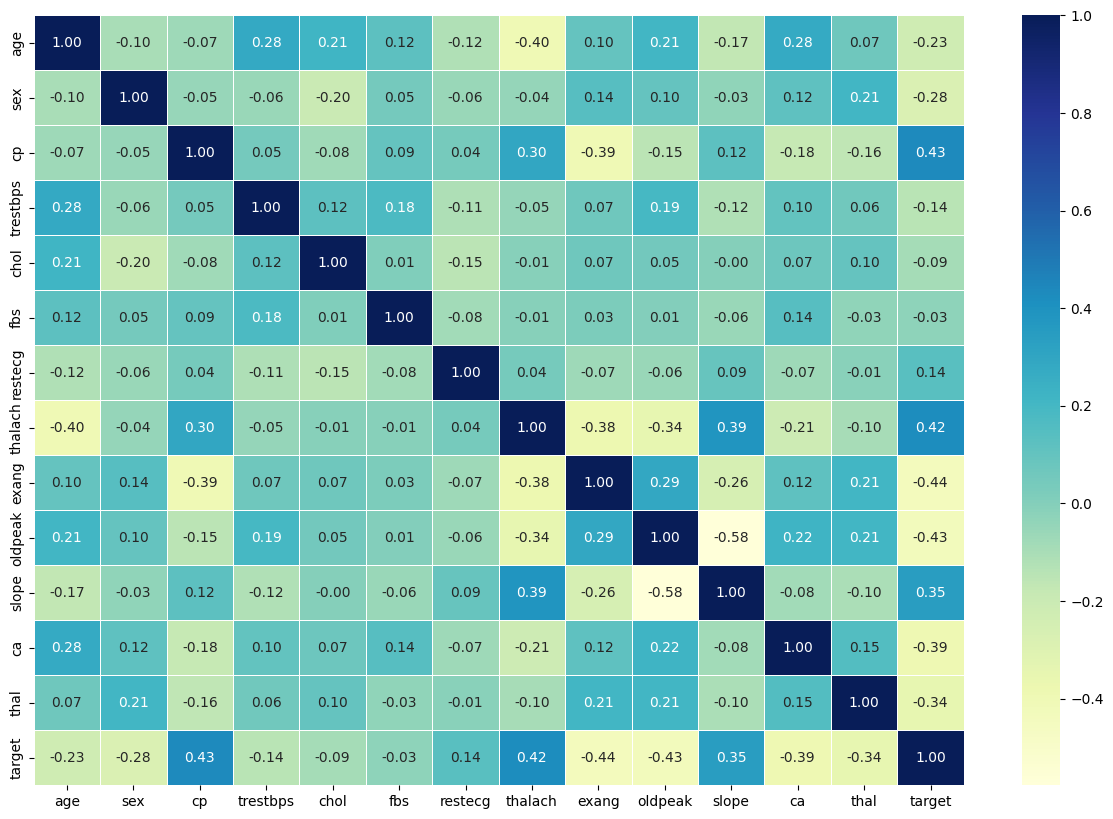

In [11]:
# make a correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

### Auto Driven Exploratory Data Analyisis 

* Curating the data for modeling

In [12]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [13]:
x = df.drop("target", axis= 1)

y = df["target"]

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
# now we prepare the data for splitting
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

In [16]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

* We are going to try 3 different models:
    1. Logistic Regression
    2. K-Nearest Neighbours Classifer
    3. Random Forest Classifer

In [17]:
models = {"Logistic Regression": LogisticRegression(max_iter=500),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create a funcition to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits the model and returns the evalutation score of the models.
    models: dictionary of models
    x_train: training data(no labels)
    x_test: testing data(no labels)
    y_train: training data (labels)
    y_test : testing data (labels)
    """
    
    np.random.seed(42)
    #score of the model
    model_score = {}

    #looping through the models
    for name, model in models.items():
        #fitting the data to the model
        model.fit(x_train, y_train)
       # y_preds = model.predict(x_test)
       # conf_matrix[name] = confusion_matrix(y_true=y_test, y_pred=y_preds)
        model_score[name] = model.score(x_test, y_test)
    return model_score

In [18]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

d:\datascience project\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

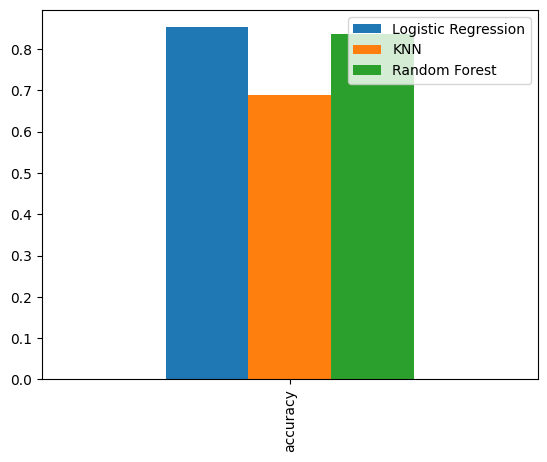

In [19]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar()

## Things which we have to prepare for the models.

* Hyperparamter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC Curve
* Area Under The Curve(AUC)

## Hyperparameter Tuning 

In [20]:
#tuning the KNN

train_scores = []
test_score = []

# create a list of different values for n_neighbors
neighbors = range(1, 21) 

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))
    

In [21]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Max score of the KNN model: 75.41%


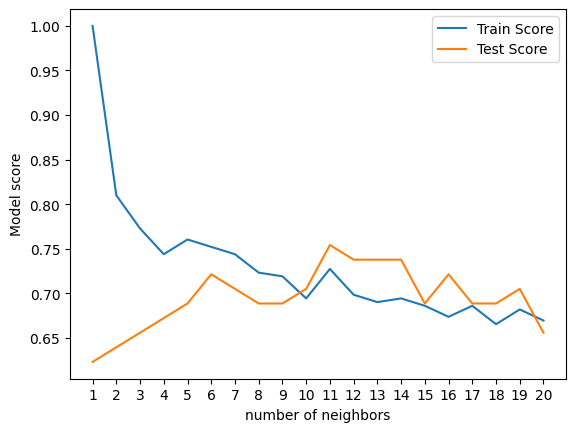

In [22]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xlabel("number of neighbors")
plt.xticks(np.arange(1, 21,1 ))
plt.ylabel("Model score")
plt.legend()

print(f"Max score of the KNN model: {max(test_score)*100:.2f}%")

## Hyperparameter tuning by RandomizedSearchCV
* logistic regersion
* randomforestclassifer()

In [23]:
# create a hyperparameter grid for logistic regression

log_reg_grid = {"C": np.logspace(-4, 4, 20, base=10),
                "solver": ["liblinear"]}

#parameters for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
np.random.seed(42)

rs_log = RandomizedSearchCV(estimator=LogisticRegression(),
                            param_distributions= log_reg_grid,
                            cv = 5,
                            n_iter= 20,
                            verbose=True)
rs_log.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log.score(x_test, y_test)

0.8852459016393442

In [27]:
np.random.seed(42)

rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv= 5,
                        n_iter= 20,
                        verbose=True)

rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
rf.score(x_test, y_test)

0.8688524590163934

## Now we will use gridsearchcv which does an exhaustive search for the best parameter for the model

In [30]:
log_grid = {"C": np.logspace(-4, 4, 30),
            "solver": ['liblinear']}

gs_log = GridSearchCV(estimator=LogisticRegression(),
                      param_grid=log_grid,
                      cv = 5,
                      verbose = True)

gs_log.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log.score(x_test, y_test)

0.8852459016393442

In [32]:
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## For evaluting our model we need a set of parameters

* AUC score or ROC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Use of cross-validation for some of the parameters would be viable

In [33]:
y_preds_prob = gs_log.predict_proba(x_test)[:,1]
y_pred = gs_log.predict(x_test)

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_preds_prob)
aucscore = auc(fpr, tpr)

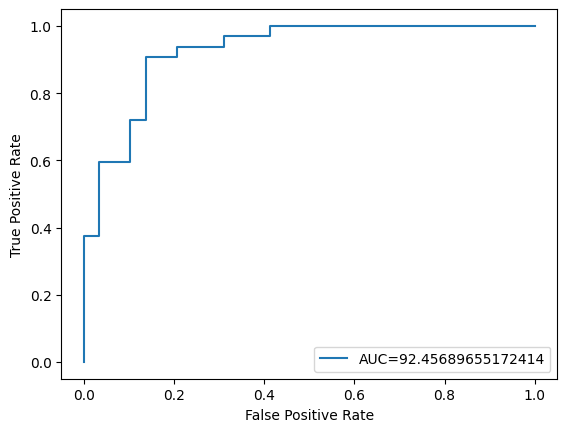

In [35]:
plt.plot(fpr, tpr, label = "AUC="+str(aucscore*100))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

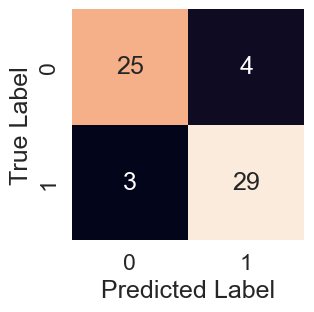

In [36]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    To plot the confusion matrix for a model.
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar=False
                     )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_matrix(y_test, y_pred)
    

In [37]:
## classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



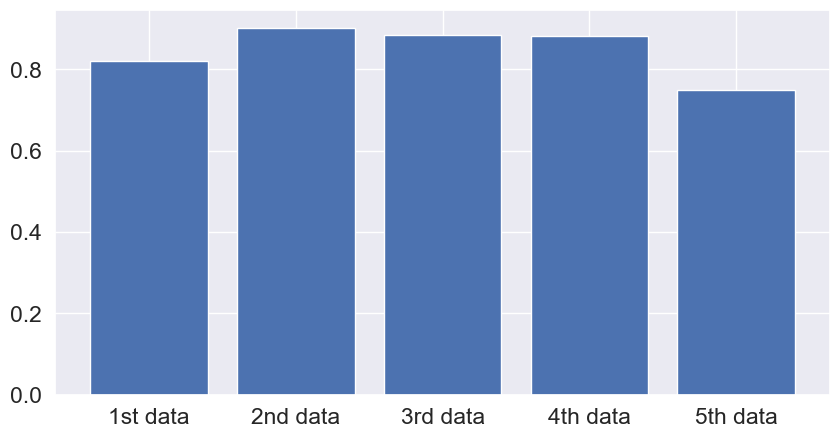

In [38]:
# New logistic model 

clf = LogisticRegression(C = 0.20433597178569418,
                         solver="liblinear")
# accuracy
ac = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
xbar= ["1st data", "2nd data", "3rd data", "4th data", "5th data"]
fig = plt.figure(figsize = (10, 5))
plt.bar(list(xbar), list(ac))
mean_ac = np.mean(ac)

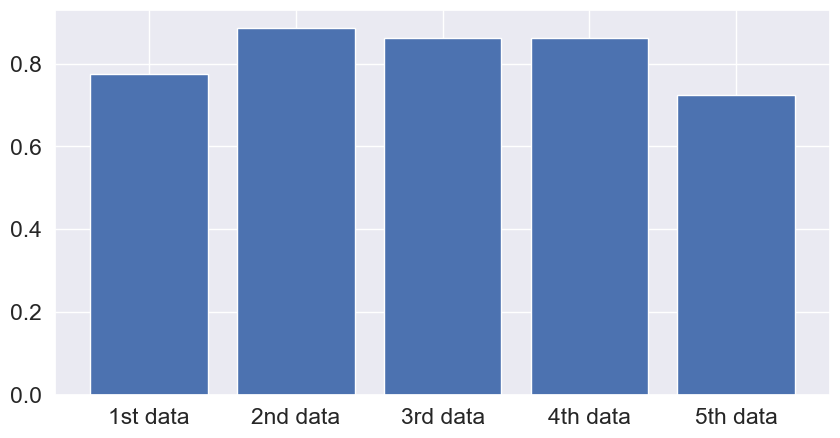

In [39]:
# precision

pre = cross_val_score(clf, x, y, cv=5, scoring="precision")

figure = plt.figure(figsize=(10,5))
plt.bar(xbar, pre)
mean_pre = np.mean(pre)

In [40]:
# recall

re = cross_val_score(clf, x, y, cv=5, scoring="recall")
mean_re = np.mean(re)

In [41]:
# f1-score

f1 = cross_val_score(clf, x, y,
                     cv=5, 
                     scoring="f1")
mean_f1= np.mean(f1)

<BarContainer object of 4 artists>

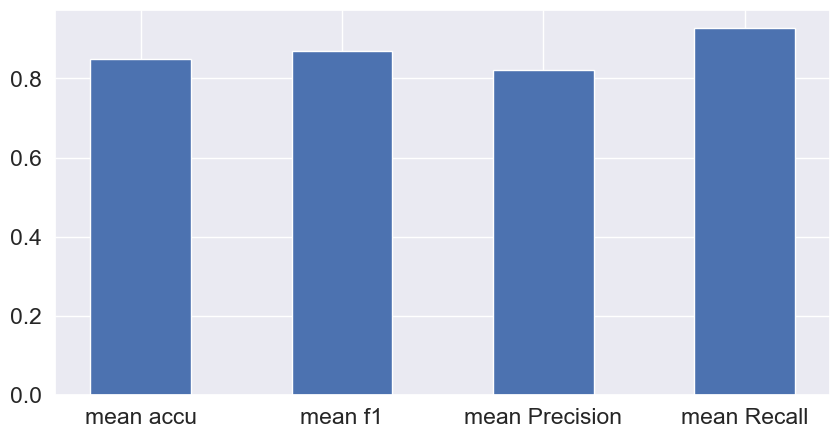

In [49]:

datapts = [mean_ac, mean_f1, mean_pre, mean_re]

labels = {"mean accu": mean_ac, "mean f1": mean_f1, "mean Precision": mean_pre, "mean Recall": mean_re}

figure = plt.figure(figsize=(10,5))

plt.bar(labels.keys(), labels.values(), width= 0.5)

In [52]:
#make a new logisticregression model to get the important features

clf = LogisticRegression(C = 0.20433597178569418,
                         solver= "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [53]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [55]:
feature_ceoff = dict(zip(df.columns, clf.coef_[0]))

In [57]:
feature_ceoff

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

(-0.9, 0.9)

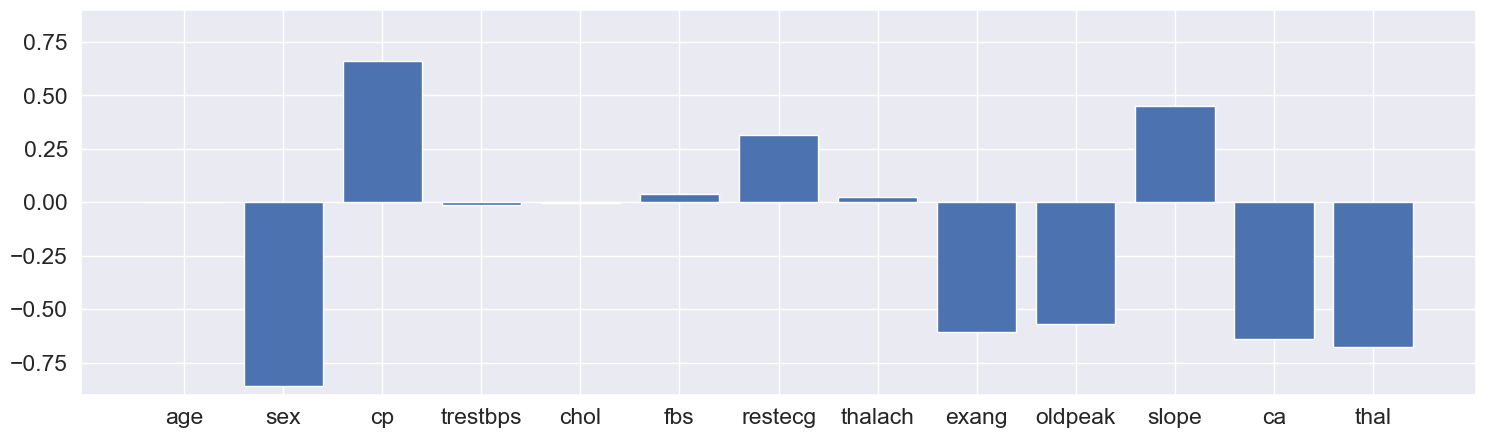

In [91]:
figure, ax = plt.subplots(figsize=(18,5))

for i in ax.patches:
    plt.text(i.get_height()+0.2, i.get_y()+0.5,
             str(round((i.get_height()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='black')


plt.bar(feature_ceoff.keys(), feature_ceoff.values())
plt.ylim(-0.90, 0.90)